# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_200_512_2_full.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_200_512_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(200 -> 512)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 6.4472819164084)
('Valid Perplexity: ', 32.517989261361)
('Test Perplexity: ', 30.289007907978)


### Loss vs. Epoch

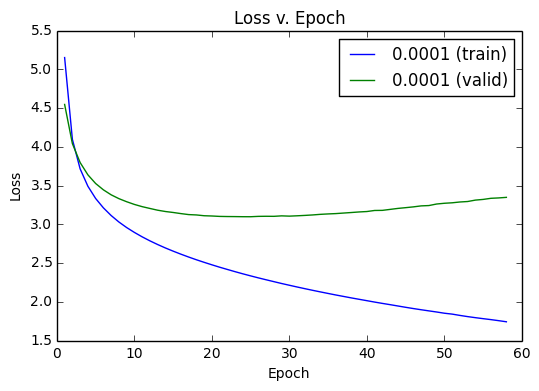

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

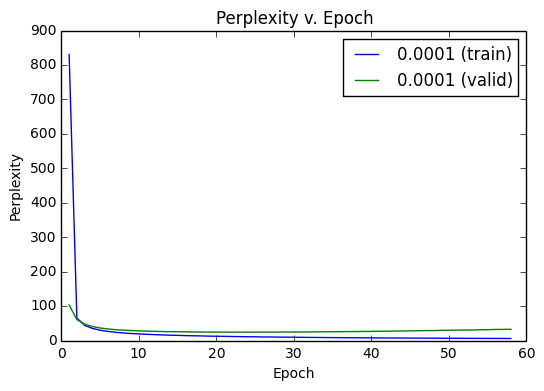

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  blackberry and apricot compote <begin_ingredients> 2 firm - ripe apricots <ing> 1 / 4 cup water <ing> 1 / 4 cup sugar <ing> 1 / 4 teaspoon freshly grated lime zest <ing> 1 cup dry white wine <ing> 1 cup picked - over blackberries <ing> accompaniment if desired : almond macaroons <end>

Gend:  <beg> place ice cream in a blender , and process until smooth . <step> combine all ingredients in a blender , and process until smooth . <end> . <end> , or serve immediately or refrigerate . <end> , if necessary , chill up to 1 hour . <end> and serve . <end> ! <end> ! <end>

True:  halve apricots lengthwise and pit . cut each apricot half into 4 wedges and transfer to a heatproof bowl . <step> in a small saucepan bring water and sugar to a boil over moderate heat , stirring until sugar is dissolved . stir in zest and wine and simmer 5 minutes . pour syrup over apricots and stir in blackberries . chill mixture 20 minutes . serve compote with macaroons . <end>



Input:  beta - carotene bomb

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  egg sandwiches with wilted spinach <begin_ingredients> 1 tsp . plus 1 tbs . olive oil <ing> 2 eggs <ing> 2 tbs . low - fat ( 1 % ) milk or water <ing> 2 thin slices manchego cheese , about 1 1 / 2 oz . total <ing> 2 whole wheat english muffins , split and toasted <ing> 1 garlic clove , smashed <ing> 2 generous handfuls baby spinach leaves , about 3 oz . <end>

Gend:  <beg> 1 . heat the olive oil in a large skillet over medium - high heat . add the onion and garlic and cook , stirring occasionally , until softened , about 3 minutes . add the garlic and cook , stirring , until fragrant , about 1 minute . add the garlic and cook for

True:  preheat an oven to 375f ° . lightly grease two 6 - oz . ramekins with the 1 tsp . olive oil . <step> in a bowl , lightly beat the eggs with the milk . divide the egg mixture between the prepared ramekins . transfer to the oven and bake until the eggs are puffy and set , 15 to 18 minutes . <step> near the end of the baking time , place a cheese 

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  healthy sweet and sour chicken <begin_ingredients> 3 - 4 boneless skinless chicken breasts , pounded to ½ inch thickness and chopped into 1 inch pieces <ing> ⅓ cup corn starch <ing> 2 tablespoons oil <ing> 1 red bell pepper , chopped <ing> 1 green bell pepper <ing> ½ white or yellow onion , chopped <ing> ¾ cup sugar <ing> ½ cup apple cider vinegar ( may sub white vinegar ) <ing> 2 tablespoons soy sauce <ing> 1 teaspoon garlic powder <ing> ½ teaspoon onion * salt <ing> ¼ cup ketchup <ing> 1 tablespoon cornstarch + 2 tablespoon cold water <ing> 1 tablespoon cornstarch + 2 tablespoon cold water <end>

Gend:  <beg> heat 1 tablespoon oil in a large skillet over medium - high heat . add garlic and ginger and stir - fry until fragrant , about 30 seconds . add garlic and ginger and cook , stirring , until fragrant , about 1 minute . add chicken and cook , stirring , until fragrant ,

True:  first prepare the sauce . add sugar , vinegar , soy sauce , garlic powder , onion salt , and ket

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.15 

1-gram Score:  55
2-gram Score:  16.8
3-gram Score:  6
4-gram Score:  3.1
